Install the necessary packages

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

%pip install regex
%pip install nltk

%pip install sklearn

You should consider upgrading via the '/Users/liljayrgudmundsdottir/Documents/DTU/CompTools4DS/Project/aaaaaa/CompTools/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/liljayrgudmundsdottir/Documents/DTU/CompTools4DS/Project/aaaaaa/CompTools/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/liljayrgudmundsdottir/Documents/DTU/CompTools4DS/Project/aaaaaa/CompTools/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/liljayrgudmundsdottir/Documents/DTU/CompTools4DS/Project/aaaaaa/CompTools/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading vi

Import necessary packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Find all the genres and how many are in each genre

In [13]:
book_reviews_pd = pd.read_csv('books_and_ratings.csv')
genre_pd = pd.DataFrame(columns=['genre', 'count'])

for index, row in book_reviews_pd.iterrows():
    genre_list = [row['categories'].strip("'[]")]
    for item in genre_list:
        if (genre_pd['genre'] == item).any():
            index = genre_pd.index[genre_pd['genre'] == item].to_list()
            genre_pd.at[index[0], 'count'] += 1
        else:
            new_row = pd.DataFrame([[item, 1]], columns=['genre', 'count'])
            genre_pd = pd.concat([genre_pd, new_row], ignore_index=True)

print(genre_pd)
genre_pd.to_csv('genre_counts.csv')

                              genre count
0                          Religion  3043
1         Biography & Autobiography  2451
2                           History  2584
3                  Juvenile Fiction  3566
4            Foreign Language Study   215
...                             ...   ...
1697          Angkor (Extinct city)     1
1698         Horror tales, American     1
1699            Colombo (Sri Lanka)     1
1700                      Mastodons     1
1701  Tarzan (Fictitious character)     1

[1702 rows x 2 columns]


Sort values correctly

In [14]:
genre_pd = pd.read_csv('genre_counts.csv')

genre_pd = genre_pd.sort_values('count', ascending=False, ignore_index=True)
genre_pd = genre_pd.drop('Unnamed: 0', axis=1)

genre_pd.to_csv('genre_counts.csv')

Print out and visualize the top 10

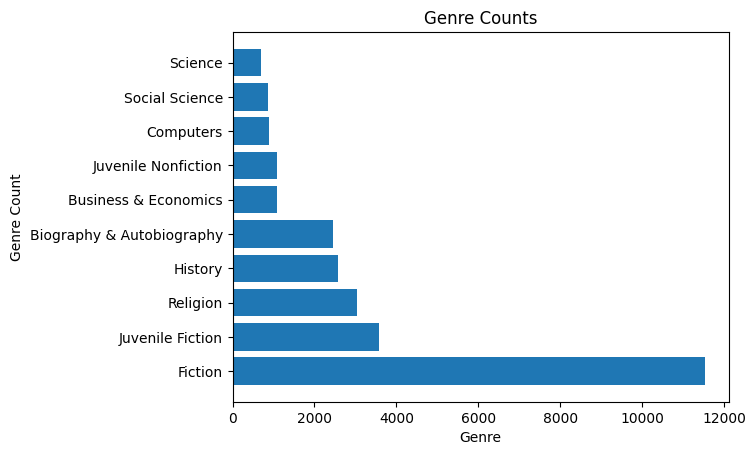

In [15]:
genre_pd = pd.read_csv('genre_counts.csv')

plt.barh(genre_pd.head(10)['genre'], genre_pd.head(10)['count'])
plt.xlabel('Genre')
plt.ylabel('Genre Count')
plt.title('Genre Counts')
plt.show()

Here are the top 20

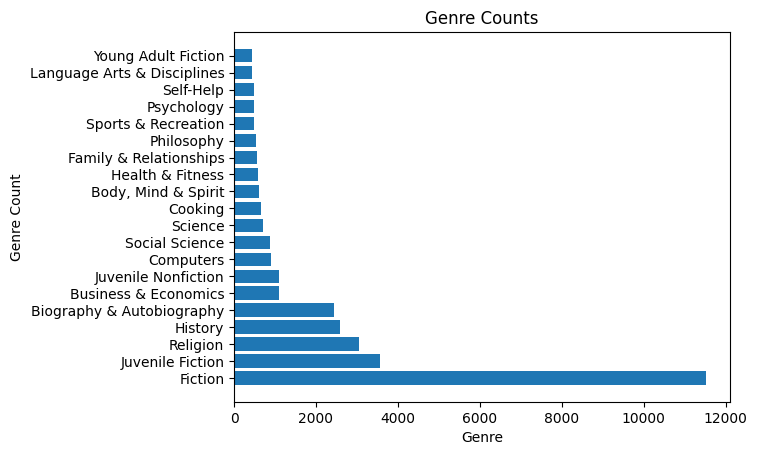

In [17]:
genre_pd = pd.read_csv('genre_counts.csv')

plt.barh(genre_pd.head(20)['genre'], genre_pd.head(20)['count'])
plt.xlabel('Genre')
plt.ylabel('Genre Count')
plt.title('Genre Counts')
plt.show()

All the different genres in order from most to least amount of books

In [19]:
print(len(genre_pd['genre'].tolist()))

1702


In [18]:
print(genre_pd['genre'].tolist())

['Fiction', 'Juvenile Fiction', 'Religion', 'History', 'Biography & Autobiography', 'Business & Economics', 'Juvenile Nonfiction', 'Computers', 'Social Science', 'Science', 'Cooking', 'Body, Mind & Spirit', 'Health & Fitness', 'Family & Relationships', 'Philosophy', 'Sports & Recreation', 'Psychology', 'Self-Help', 'Language Arts & Disciplines', 'Young Adult Fiction', 'Literary Criticism', 'Political Science', 'Poetry', 'Art', 'Education', 'Nature', 'Music', 'Travel', 'Comics & Graphic Novels', 'Performing Arts', 'Medical', 'Humor', 'Reference', 'Crafts & Hobbies', 'Technology & Engineering', 'Mathematics', 'Drama', 'Foreign Language Study', 'Literary Collections', 'True Crime', 'Architecture', 'Pets', 'Games & Activities', 'Gardening', 'Transportation', 'Law', 'Photography', 'Bibles', 'House & Home', '"Children\'s stories"', 'Antiques & Collectibles', 'Design', 'Games', 'Detective and mystery stories', 'Animals', 'Study Aids', 'Young Adult Nonfiction', 'Great Britain', 'American ficti

In [60]:
genres_pd = pd.read_csv('big_genre_groups.csv')

for index, row in genres_pd.iterrows():
    # print(index)
    genres_pd['SubGenre'][index] = set(row['SubGenre'].strip("' }{ '").strip(" ").split(","))

print(type(genres_pd))
print(genres_pd.columns)

print(type(genres_pd['SubGenre'][0]))
print(genres_pd.dtypes)

print('Fiction' in genres_pd['SubGenre'])

<class 'pandas.core.frame.DataFrame'>
Index(['Unnamed: 0', 'GroupGenre', 'SubGenre'], dtype='object')
<class 'set'>
Unnamed: 0     int64
GroupGenre    object
SubGenre      object
dtype: object
False


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/266761893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_pd['SubGenre'][index] = set(row['SubGenre'].strip("' }{ '").strip(" ").split(","))


In [81]:
genres_pd = pd.read_csv('big_genre_groups.csv')

# print(type(genres_pd['SubGenre'][0]))

# g_list = genres_pd['SubGenre'][0].strip("' }{ '").strip(" ").split(",")
# # print(g_list)
# # print(type(g_list))
# g_set = set(g_list)
# # print(g_set)
# print('Fiction' in g_set)

# print(type(genres_pd['SubGenre'][0]))

books_pd = pd.read_csv('books_and_ratings.csv')
# print(books_pd.head(5)['categories'])

for index, row in books_pd.iterrows():
    exists = False
    # print(index)
    # print(row)
    # print(row['categories'])
    item = row['categories'].strip("['']").strip(".").lower()
    # print(index)
    for index2, row2 in genres_pd.iterrows():
        # print(row2['SubGenre'])
        if(item in row2['SubGenre'].lower()):
            # print(f"Found {item} in {index2}")
            books_pd['categories'].loc[index] = row2['GroupGenre']
            exists = True
            break

    if(not exists):
        print(f"dropping {item} in row {index}")
        books_pd = books_pd.drop(index)


books_pd = books_pd.drop('Unnamed: 0.1', axis=1)
books_pd = books_pd.drop('Unnamed: 0', axis=1)

# print(books_pd.head(10)['categories'])
# print(books_pd.head(10))


books_pd.to_csv("generalized_books_and_ratings.csv")

/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping adventure stories in row 15
dropping body, mind & spirit in row 22
dropping abap/4 (computer program language) in row 27
dropping body, mind & spirit in row 50
dropping body, mind & spirit in row 73
dropping body, mind & spirit in row 90
dropping body, mind & spirit in row 91
dropping church and state in row 95
dropping body, mind & spirit in row 98
dropping ghost stories, american in row 127
dropping body, mind & spirit in row 148
dropping church group work in row 150
dropping monk, william (fictitious character) in row 187
dropping aeronautics, military in row 223


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's poetry, english." in row 225
dropping detective and mystery stories, american in row 227
dropping dee jen-djieh (fictitious character) in row 248
dropping pentecostalism in row 251
dropping christian ethics in row 255
dropping siskiyou mountains (calif. and or.) in row 256
dropping marijuana in row 280
dropping crystal optics in row 332
dropping soldiers in row 333
dropping authors, american in row 340
dropping copyright in row 377


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 389
dropping eastern pomo language in row 392
dropping comic books, strips, etc in row 398
dropping child sexual abuse in row 434
dropping career changes in row 442
dropping body, mind & spirit in row 444
dropping self-help in row 451
dropping historiography in row 481
dropping accelerated readers in row 485
dropping body, mind & spirit in row 492
dropping russian poetry in row 502
dropping self-help in row 520


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 539
dropping body, mind & spirit in row 553
dropping audiobooks in row 569
dropping body, mind & spirit in row 573
dropping body, mind & spirit in row 598
dropping job hunting in row 627
dropping british columbia in row 638
dropping self-help in row 651
dropping body, mind & spirit in row 657
dropping "children's stories" in row 701


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 705
dropping animal sounds in row 706
dropping needlework in row 733
dropping japanese language in row 736
dropping intellectuals in row 737
dropping audiobooks in row 767
dropping body, mind & spirit in row 768
dropping self-help in row 783
dropping self-help in row 799
dropping body, mind & spirit in row 804
dropping self-help in row 806
dropping body, mind & spirit in row 831
dropping body, mind & spirit in row 838


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping hallucinogenic drugs in row 843
dropping consumption (economics) in row 873
dropping self-help in row 878
dropping jazz musicians in row 887
dropping short stories in row 909
dropping body, mind & spirit in row 930
dropping functions of real variables in row 931
dropping college readers in row 937


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 945
dropping self-help in row 951
dropping body, mind & spirit in row 954
dropping body, mind & spirit in row 972
dropping dakota territory in row 996
dropping body, mind & spirit in row 1010
dropping stories in rhyme in row 1012
dropping aboriginal australians in row 1019


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping contentment in row 1021
dropping cookery, french in row 1054
dropping siberia (russia) in row 1056
dropping adventure stories in row 1082
dropping adirondack mountains (n.y.) in row 1099
dropping teachers in row 1113


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 1137
dropping labor day in row 1139
dropping comic books, strips, etc in row 1157
dropping body, mind & spirit in row 1162
dropping self-help in row 1167
dropping horse breeds in row 1194
dropping pigeons in row 1225


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 1234
dropping audiobooks in row 1236
dropping aliens in row 1259
dropping authors, irish in row 1265
dropping cooking, creole in row 1278
dropping appleby, john, sir (fictitious character) in row 1295
dropping death in row 1297
dropping burgundy (france) in row 1298
dropping hymn writers in row 1305
dropping "children's poetry, english" in row 1355
dropping civilization, modern in row 1356


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping adventure stories in row 1360
dropping self-help in row 1363
dropping body, mind & spirit in row 1386
dropping ciszek, walter j in row 1409
dropping body, mind & spirit in row 1410
dropping body, mind & spirit in row 1414
dropping fort lauderdale (fla.) in row 1422
dropping "lord's prayer" in row 1425
dropping body, mind & spirit in row 1434
dropping body, mind & spirit in row 1446
dropping self-help in row 1470
dropping anarchism in row 1471
dropping salvation in row 1483
dropping canadian literature in row 1484
dropping authors, australian in row 1514
dropping body, mind & spirit in row 1579


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping brass instrument players in row 1639
dropping foster home care in row 1648
dropping decision making in row 1714
dropping misconduct in office in row 1734
dropping afghanistan in row 1756
dropping "children's stories" in row 1824


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 1912
dropping "children's literature" in row 1953
dropping body, mind & spirit in row 1959
dropping self-help in row 1969
dropping automobile travel / united states in row 2014
dropping self-help in row 2017
dropping "children's stories" in row 2018
dropping juvenile science fiction in row 2021


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 2029
dropping indonesia in row 2037
dropping calaveras county (calif.) in row 2052
dropping grandmothers in row 2086
dropping body, mind & spirit in row 2091
dropping books and reading in row 2092
dropping hell in row 2138
dropping amnesia in row 2143
dropping badgers in row 2175


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 2180
dropping body, mind & spirit in row 2188
dropping chemotaxonomy in row 2198
dropping boarding schools in row 2266
dropping embroidery in row 2325
dropping change (psychology) in row 2326
dropping self-help in row 2346
dropping reconstruction (u.s. history, 1865-1877) in row 2357
dropping judges in row 2358
dropping dramatists, english in row 2368
dropping self-help in row 2377
dropping world war, 1939-1945 in row 2385
dropping african american criminals in row 2402
dropping body, mind & spirit in row 2429
dropping mythology, celtic in row 2438
dropping electronic books in row 2487
dropping self-help in row 2502
dropping authors, english in row 2504


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 2507
dropping cleanliness in row 2523
dropping authors, english in row 2542
dropping submarine captains in row 2543
dropping paranormal romance stories in row 2548
dropping bachelors in row 2554
dropping aging in row 2567
dropping leadership in row 2571
dropping broach, bauchelain (fictitious character) in row 2572
dropping body, mind & spirit in row 2576
dropping body, mind & spirit in row 2594
dropping aphrodisiacs in row 2598
dropping "children's poetry" in row 2638


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping chile in row 2645
dropping adventure stories in row 2647
dropping body, mind & spirit in row 2678
dropping self-help in row 2684
dropping american wit and humor, pictorial in row 2710
dropping shopping centers in row 2719
dropping legends in row 2722
dropping board books in row 2738
dropping body, mind & spirit in row 2776
dropping fantasy comic books, strips, etc in row 2806


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 2809
dropping body, mind & spirit in row 2816
dropping sharing in row 2837
dropping self-help in row 2838
dropping detective and mystery stories, american in row 2842
dropping body, mind & spirit in row 2855
dropping body, mind & spirit in row 2887
dropping african american authors in row 2917
dropping self-help in row 2939
dropping "children's poetry" in row 2943
dropping creative writing in row 2949


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping franco-prussian war, 1870-1871 in row 2958
dropping beauty contests in row 2973
dropping illegitimacy in row 2980
dropping creative writing in row 2997
dropping self-help in row 3027
dropping self-help in row 3041
dropping body, mind & spirit in row 3051
dropping self-help in row 3053
dropping "distinctive features (linguistic's)" in row 3055
dropping world war, 1939-1945 in row 3068


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping family secrets in row 3149
dropping "children's stories" in row 3154
dropping machine sewing in row 3159
dropping self-help in row 3166
dropping world war, 1939-1945 in row 3173
dropping colombia in row 3180
dropping adoptees in row 3204
dropping cadfael, brother (fictitious character) in row 3224
dropping pelée, mount (martinique) in row 3268
dropping american wit and humor, pictorial in row 3279
dropping africa, central in row 3303


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping civilization, modern in row 3314
dropping body, mind & spirit in row 3329
dropping gay men in row 3381
dropping cincinnati (ohio) in row 3387
dropping body, mind & spirit in row 3388
dropping comic books, strips, etc in row 3392
dropping self-help in row 3408
dropping abenaki indians in row 3409
dropping body, mind & spirit in row 3414
dropping youth in row 3427
dropping brown, charlie (fictitious character) in row 3468


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping labor movement in row 3486
dropping mythology, norse in row 3502
dropping body, mind & spirit in row 3509
dropping rug and carpet industry in row 3513
dropping body, mind & spirit in row 3538
dropping "children's poetry, english." in row 3550
dropping body, mind & spirit in row 3563
dropping self-help in row 3568
dropping mathematical recreations in row 3569
dropping body, mind & spirit in row 3628
dropping economic policy in row 3629
dropping crusoe, robinson (fictitious character) in row 3630
dropping self-help in row 3670
dropping anthropologists in row 3683
dropping chernobyl nuclear accident, chornobylʹ, ukraine, 1986 in row 3730


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's plays, new zealand" in row 3732
dropping feminism and art in row 3755
dropping body, mind & spirit in row 3786
dropping bible stories, english in row 3788
dropping comic books, strips, etc in row 3809
dropping "children's stories" in row 3820
dropping adventure stories in row 3830


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping aztec magic in row 3833
dropping body, mind & spirit in row 3854
dropping academic achievement in row 3860
dropping recreational vehicle living in row 3869
dropping civilization, medieval in row 3870
dropping "children's stories, american." in row 3876
dropping carols in row 3904
dropping good and evil in row 3924


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping accidents in row 3925
dropping body, mind & spirit in row 3928
dropping body, mind & spirit in row 3937
dropping chinese americans in row 3940
dropping body, mind & spirit in row 3962
dropping body, mind & spirit in row 3975
dropping "alzheimer's disease" in row 3980
dropping "children's stories" in row 3990
dropping body, mind & spirit in row 4002
dropping self-help in row 4012
dropping self-help in row 4020
dropping austria in row 4035
dropping human-alien encounters in row 4036


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping african american children in row 4042
dropping spanish poetry in row 4048
dropping botany in row 4068
dropping self-help in row 4076
dropping clothing and dress in row 4078
dropping law students in row 4085
dropping canberra (a.c.t.) in row 4109
dropping dalziel, andrew (fictitious character) in row 4132
dropping massachusetts in row 4170
dropping gay men in row 4186


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 4194
dropping authors, irish in row 4224
dropping campaign debates in row 4228
dropping auschwitz (poland : concentration camp) in row 4242
dropping race relations in row 4274
dropping body, mind & spirit in row 4327
dropping self-help in row 4332
dropping body, mind & spirit in row 4349


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 4422
dropping self-help in row 4423
dropping self-help in row 4446
dropping self-help in row 4457
dropping authors, english in row 4485
dropping electronic books in row 4521
dropping adventure stories in row 4530
dropping body, mind & spirit in row 4588
dropping self-help in row 4598


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping german americans in row 4627
dropping "children's stories, australian" in row 4658
dropping "children's poetry, american" in row 4659
dropping artists, dutch in row 4682
dropping national characteristics, american in row 4704
dropping body, mind & spirit in row 4725
dropping "abu ageila, battle of, abu 'ujaylah, egypt, 1956" in row 4742
dropping large type books in row 4773
dropping "children's stories" in row 4797
dropping body, mind & spirit in row 4817


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping atlanta campaign, 1864 in row 4826
dropping science fiction, american in row 4835
dropping self-help in row 4844
dropping fuentes de oñoro, battle of, fuentes de oñoro, spain, 1811 in row 4856
dropping anecdotes in row 4864
dropping self-help in row 4869
dropping body, mind & spirit in row 4892
dropping "children's stories" in row 4904
dropping self-help in row 4905


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']


dropping rice wines in row 4924
dropping body, mind & spirit in row 4944
dropping counted thread embroidery in row 4952
dropping body, mind & spirit in row 4980
dropping body, mind & spirit in row 4982
dropping public prosecutors in row 4995
dropping animal communication in row 5006


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 5077
dropping photography of wolves in row 5082
dropping self-help in row 5097
dropping brooklyn (new york, n.y.) in row 5107
dropping conformity in row 5131
dropping holocaust, jewish (1939-1945) in row 5177
dropping back bay (boston, mass.) in row 5185


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping mr. men (fictitious characters) in row 5224
dropping africa, west in row 5240
dropping holocaust, jewish (1939-1945) in row 5258
dropping body, mind & spirit in row 5260
dropping shepherds in row 5262
dropping african-american soldiers in row 5277
dropping cork (ireland : co in row 5284
dropping cartoonists in row 5298
dropping body, mind & spirit in row 5313
dropping body, mind & spirit in row 5316
dropping body, mind & spirit in row 5323


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping genetic engineering in row 5326
dropping body, mind & spirit in row 5357
dropping self-help in row 5386
dropping spice trade in row 5388
dropping charity-schools in row 5430


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 5437
dropping new south wales in row 5449
dropping nonsense verses in row 5460
dropping body, mind & spirit in row 5468
dropping self-help in row 5499
dropping self-help in row 5500
dropping "children's stories" in row 5501
dropping bodybuilders in row 5532


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping sea monsters in row 5565
dropping presidents in row 5568
dropping self-help in row 5577
dropping adventure stories in row 5586
dropping body, mind & spirit in row 5602
dropping body, mind & spirit in row 5627
dropping clothing and dress in row 5629
dropping body, mind & spirit in row 5700


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories" in row 5719
dropping mongolia in row 5736
dropping atheletes in row 5739
dropping "children's poetry" in row 5756
dropping gynecologists in row 5761
dropping criminals in row 5771
dropping self-help in row 5773
dropping adventure and adventurers in row 5814
dropping self-help in row 5818
dropping self-help in row 5839
dropping burma in row 5840


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 5844
dropping earp, wyatt in row 5848
dropping computational linguistics in row 5849
dropping electronic books in row 5860
dropping self-help in row 5877
dropping africa, southern in row 5919
dropping body, mind & spirit in row 5952
dropping self-help in row 5961
dropping astronautics in art in row 5981


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 5996
dropping sierra nevada (calif. and nev.) in row 6008
dropping self-help in row 6022
dropping body, mind & spirit in row 6028
dropping computer industry in row 6067
dropping investments in row 6090
dropping great books of the western world in row 6093
dropping art and mental illness in row 6107
dropping body, mind & spirit in row 6109
dropping body, mind & spirit in row 6128
dropping "children's poetry" in row 6155


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping voyages around the world in row 6165
dropping arithmetic in row 6170
dropping self-help in row 6171
dropping detective and mystery stories, american in row 6187
dropping classification, decimal in row 6197
dropping emigration and immigration in row 6205
dropping domestic education in row 6213
dropping perception in row 6221
dropping body, mind & spirit in row 6248
dropping body, mind & spirit in row 6267
dropping real estate investment in row 6278
dropping arson in row 6308


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping world war, 1939-1945 in row 6332
dropping self-help in row 6345
dropping faith in row 6369
dropping national characteristics, american in row 6382
dropping high interest-low vocabulary books in row 6385
dropping bp deepwater horizon explosion and oil spill, 2010 in row 6400
dropping antarctica in row 6409
dropping algorithms in row 6438
dropping body, mind & spirit in row 6485
dropping cat owners in row 6493


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 6536
dropping self-help in row 6556
dropping body, mind & spirit in row 6619
dropping clans in row 6632
dropping college teachers in row 6635
dropping self-help in row 6651
dropping folk songs, english in row 6695
dropping clothing and dress in row 6699
dropping artists, dutch in row 6705


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping adventure stories in row 6709
dropping usonian houses in row 6748
dropping literary recreations in row 6749
dropping chick lit in row 6775
dropping assassins in row 6798
dropping self-help in row 6807
dropping copyright in row 6820
dropping "children's stories" in row 6822
dropping "children's literature" in row 6830
dropping black holes (astronomy) in row 6866


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 6874
dropping self-help in row 6908
dropping self-help in row 6917
dropping chee, jim (fictional character) in row 6949
dropping body, mind & spirit in row 6972
dropping austria in row 6985
dropping body, mind & spirit in row 7021
dropping self-help in row 7045


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 7052
dropping campion, albert (fictitious character) in row 7053
dropping birdsongs in row 7085
dropping programmed instruction in row 7093
dropping body, mind & spirit in row 7099
dropping "children's stories" in row 7100
dropping self-help in row 7103
dropping body, mind & spirit in row 7127
dropping body, mind & spirit in row 7135
dropping self-help in row 7145
dropping self-help in row 7170
dropping evolution (biology) in row 7193


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 7245
dropping body, mind & spirit in row 7280
dropping anansi (legendary character) in row 7283
dropping ethnology in row 7304
dropping civil war in row 7323
dropping "children's poetry, american" in row 7356
dropping body, mind & spirit in row 7380
dropping american wit and humor, pictorial in row 7447


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping world war, 1939-1945 in row 7463
dropping 11030 - fiction in english - p1030 - new zealand writers - 1907- - 60030 - texts in row 7477
dropping feng shui in row 7494
dropping self-help in row 7521
dropping comanche indians in row 7537
dropping gobi desert (mongolia and china) in row 7565
dropping self-help in row 7568
dropping epic poetry, greek in row 7606
dropping parasols in row 7628


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 7645
dropping "children's literature" in row 7648
dropping alternative stories in row 7662
dropping act assessment in row 7667
dropping body, mind & spirit in row 7704
dropping women authors, irish in row 7730
dropping body, mind & spirit in row 7744
dropping 11030 - fiction in english - p1030 - greene, graham - 60030 - biographies in row 7759
dropping body, mind & spirit in row 7763
dropping adventure and adventurers in row 7766
dropping aboriginal australians in row 7789


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 7833
dropping history, modern in row 7839
dropping suvarrow islands in row 7847
dropping big books in row 7851
dropping self-help in row 7867
dropping identity (psychology) in row 7899
dropping presidents in row 7910
dropping body, mind & spirit in row 7948
dropping self-help in row 7978


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping creoles in row 8000
dropping drugs in row 8007
dropping body, mind & spirit in row 8083
dropping self-help in row 8085
dropping fantasy football (game) in row 8114
dropping body, mind & spirit in row 8123


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 8162
dropping self-help in row 8169
dropping self-help in row 8176
dropping espionage in row 8182
dropping celtic church in row 8211
dropping mulder, fox (fictitious character) in row 8213
dropping cryptography in row 8234
dropping hamptons (n.y.) in row 8245
dropping italy in row 8261
dropping body, mind & spirit in row 8262
dropping brewing in row 8275
dropping self-help in row 8278
dropping self-help in row 8311


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping rock groups in row 8341
dropping adventure stories in row 8369
dropping canadian drama (french) in row 8381
dropping body, mind & spirit in row 8387
dropping body, mind & spirit in row 8394
dropping self-help in row 8417
dropping earthsea (imaginary place) in row 8422
dropping dystopian plays in row 8425
dropping commercial crimes in row 8441
dropping self-help in row 8443
dropping decoration and ornament, architectural in row 8449
dropping body, mind & spirit in row 8475


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping science fiction, american in row 8519
dropping body, mind & spirit in row 8526
dropping civilization, modern in row 8618
dropping body, mind & spirit in row 8650
dropping self-help in row 8671
dropping body, mind & spirit in row 8673
dropping body, mind & spirit in row 8678
dropping self-help in row 8704


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping human reproduction in row 8724
dropping conservationists in row 8726
dropping interpersonal conflict in row 8747
dropping "children's literature, english" in row 8748
dropping self-help in row 8751
dropping short stories, canadian in row 8785
dropping body, mind & spirit in row 8803
dropping body, mind & spirit in row 8818
dropping electronic books in row 8825
dropping good and evil in row 8828
dropping self-help in row 8842
dropping constantine, john (fictitious character) in row 8850
dropping motion picture plays in row 8879


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 8883
dropping body, mind & spirit in row 8885
dropping antarctica in row 8891
dropping body, mind & spirit in row 8944
dropping self-help in row 8955
dropping bangkok (thailand) in row 8959
dropping body, mind & spirit in row 8962
dropping self-help in row 8967
dropping art, dutch in row 8983
dropping cassidy, hopalong (fictitious character) in row 9000
dropping british columbia in row 9008
dropping world war, 1939-1945 in row 9024


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping alcoholism in row 9039
dropping bridges in row 9055
dropping self-help in row 9066
dropping railroad travel in row 9076
dropping biology in row 9078
dropping science fiction, american in row 9091
dropping self-help in row 9098
dropping body, mind & spirit in row 9099
dropping self-help in row 9110
dropping generative grammar in row 9131
dropping authors, english in row 9133
dropping self-help in row 9150
dropping bildungsromans in row 9175


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping cocaine industry in row 9210
dropping african fiction (english) in row 9212
dropping "children's stories" in row 9213
dropping self-help in row 9215
dropping large type books in row 9216
dropping body, mind & spirit in row 9219
dropping "children's stories" in row 9237
dropping self-help in row 9240
dropping rīga (latvia) in row 9242
dropping imperialism in row 9315
dropping body, mind & spirit in row 9330
dropping world war ii, 1939-1945 in row 9356


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 9357
dropping body, mind & spirit in row 9369
dropping body, mind & spirit in row 9384
dropping adventure stories in row 9389
dropping self-help in row 9395
dropping authors, irish in row 9400
dropping body, mind & spirit in row 9407
dropping body, mind & spirit in row 9411
dropping fables, american in row 9414
dropping allegories in row 9455
dropping aboriginal australians in row 9457
dropping "children's stories" in row 9467
dropping readers in row 9480


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 9497
dropping drugs in row 9515
dropping fantasy fiction, english in row 9518
dropping "children's stories" in row 9528
dropping women physicians in row 9544
dropping abortion in row 9546
dropping crystals in row 9549
dropping marine pollution in row 9553
dropping self-help in row 9561
dropping quakers in row 9562
dropping free trade in row 9619


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping appliqué in row 9635
dropping conservation of natural resources in row 9664
dropping self-help in row 9701
dropping body, mind & spirit in row 9716
dropping body, mind & spirit in row 9739


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories, english" in row 9745
dropping apennines (italy) in row 9747
dropping books and reading in row 9779
dropping atrocities in row 9780
dropping banks and banking in row 9790
dropping "children's stories, swiss (german)" in row 9802


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 9842
dropping electronic books in row 9851
dropping self-help in row 9864
dropping self-help in row 9866
dropping costume design in row 9909
dropping self-help in row 9918
dropping authors, english in row 9932
dropping cadfael, brother (fictitious character) in row 9935
dropping color decoration and ornament in row 9951


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 9962
dropping novelists, english in row 9977
dropping self-help in row 9979
dropping body, mind & spirit in row 10015
dropping body, mind & spirit in row 10035
dropping bobbsey twins (fictitious characters) in row 10036
dropping self-help in row 10070
dropping body, mind & spirit in row 10131


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping aardvark in row 10153
dropping colorado in row 10182
dropping beaches in row 10186
dropping body, mind & spirit in row 10201
dropping africa, north in row 10230
dropping body, mind & spirit in row 10266


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping authorship in row 10273
dropping flower arrangement in row 10279
dropping human-alien encounters in row 10283
dropping self-help in row 10289
dropping anatomy, artistic in row 10290
dropping self-help in row 10304
dropping copyright in row 10351
dropping lost treasure in row 10390


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 10396
dropping bildungsromans in row 10402
dropping "children's stories" in row 10414
dropping electronic books in row 10422
dropping self-help in row 10458
dropping self-help in row 10459
dropping self-help in row 10463
dropping europe in row 10510


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 10552
dropping camping in row 10555
dropping amur river (siberia) in row 10573
dropping animal welfare in row 10585
dropping body, mind & spirit in row 10602
dropping edible landscaping in row 10610
dropping arab nationalism in row 10634
dropping body, mind & spirit in row 10658
dropping beauty, personal in row 10661


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping acupuncture in row 10673
dropping cereals, prepared in row 10680
dropping self-help in row 10682
dropping philosophy, taoist in row 10707
dropping calcutta (india) in row 10742
dropping coronary heart disease in row 10746
dropping feminism in row 10783
dropping body, mind & spirit in row 10784
dropping reading in row 10792
dropping self-help in row 10805
dropping body, mind & spirit in row 10820


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping poets, american in row 10837
dropping blind in row 10851
dropping self-help in row 10857
dropping "children's stories" in row 10865
dropping self-help in row 10874
dropping body, mind & spirit in row 10879
dropping alienation (philosophy) in row 10889
dropping body, mind & spirit in row 10892
dropping body, mind & spirit in row 10894
dropping statistical mechanics in row 10900
dropping encyclopaedia in row 10906
dropping self-help in row 10978
dropping comic books, strips, etc in row 10979
dropping self-help in row 10986
dropping self-help in row 10999
dropping self-help in row 11016
dropping economic assistance, american in row 11057
dropping body, mind & spirit in row 11061
dropping algebras, linear in row 11105
dropping "children's literature" in row 11107
dropping self-help in row 11120
dropping body, mind & spirit in row 11122


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 11142
dropping body, mind & spirit in row 11164
dropping self-help in row 11168
dropping world war, 1939-1945 in row 11182
dropping body, mind & spirit in row 11185
dropping body, mind & spirit in row 11239


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories" in row 11256
dropping bicycles in row 11259
dropping body, mind & spirit in row 11286
dropping missions in row 11295
dropping self-help in row 11320
dropping self-help in row 11345
dropping authors and publishers in row 11436


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping copyright in row 11457
dropping office practice in row 11481
dropping personality in row 11487
dropping generative organs, female in row 11488
dropping internet in row 11513
dropping body, mind & spirit in row 11538
dropping self-help in row 11543
dropping cililization, homeric in row 11550
dropping self-help in row 11572
dropping gestalt psychology in row 11578
dropping self-help in row 11622
dropping "children's stories" in row 11623
dropping world war, 1939-1945 in row 11630
dropping "children's conduct of life" in row 11648
dropping cenci, beatrice in row 11658
dropping self-help in row 11666
dropping self-help in row 11675
dropping cartwright, peter, 1785-1872 in row 11687
dropping industrial equipment in interior decoration in row 11746
dropping body, mind & spirit in row 11757
dropping body, mind & spirit in row 11778


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 11826
dropping world war, 1939-1945 in row 11892
dropping body, mind & spirit in row 11918
dropping self-help in row 11931
dropping castaways in row 11951
dropping self-help in row 11953
dropping "children's stories, american" in row 11964
dropping married women in row 11996


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping london (england) in row 12032
dropping death in row 12052
dropping self-help in row 12054
dropping contracts in row 12094
dropping body, mind & spirit in row 12097
dropping body, mind & spirit in row 12118
dropping self-help in row 12131
dropping self-help in row 12145
dropping body, mind & spirit in row 12162
dropping body, mind & spirit in row 12166
dropping body, mind & spirit in row 12168
dropping holocaust, jewish (1939-1945) in row 12173


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping crossword puzzle makers in row 12175
dropping body, mind & spirit in row 12194
dropping self-help in row 12203
dropping freak shows in row 12292
dropping girls in row 12310
dropping "children's stories" in row 12318
dropping self-help in row 12324
dropping body, mind & spirit in row 12326
dropping "children's stories" in row 12342


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 12355
dropping self-help in row 12358
dropping self-help in row 12369
dropping self-help in row 12397
dropping authors, french in row 12441
dropping self-help in row 12455
dropping abduction in row 12456
dropping caldecott medal in row 12488
dropping animals, legends and stories of in row 12496
dropping animal treatment in row 12506


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories" in row 12512
dropping fables in row 12517
dropping job hunting in row 12527
dropping mythologie ancienne - dictionnaires anglais in row 12569
dropping self-help in row 12577
dropping "children's stories" in row 12589
dropping "children's stories, swiss (german)" in row 12650
dropping orphans in row 12662
dropping body, mind & spirit in row 12668
dropping self-help in row 12670


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 12674
dropping self-help in row 12695
dropping "children's stories" in row 12697
dropping celts in row 12720
dropping ethnologie in row 12722
dropping electronic books in row 12777
dropping autocad in row 12780
dropping body, mind & spirit in row 12793
dropping detective and mystery stories, english in row 12804
dropping reconstruction (u.s. history, 1865-1877) in row 12811
dropping christian education of children in row 12826
dropping veterinarians in row 12827
dropping body, mind & spirit in row 12835
dropping architecture, domestic in row 12859
dropping subways in row 12865
dropping self-help in row 12876
dropping body, mind & spirit in row 12888
dropping gay erotic stories in row 12909
dropping self-help in row 12976
dropping large type books in row 12987


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 13010
dropping self-help in row 13011
dropping self-help in row 13012
dropping body, mind & spirit in row 13033
dropping deafblind women in row 13062
dropping presidents in row 13078
dropping body, mind & spirit in row 13092
dropping acculturation in row 13113
dropping self-help in row 13203


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping christian poetry, scottish gaelic in row 13227
dropping body, mind & spirit in row 13228
dropping american wit and humor, pictorial in row 13234
dropping fantastic comic books, strips, etc in row 13291
dropping world war, 1939-1945 in row 13295
dropping cuentos in row 13304
dropping self-help in row 13310
dropping motherhood in row 13317
dropping illumination of books and manuscripts in row 13333
dropping body, mind & spirit in row 13341
dropping ally (fictitious character : mccombie) in row 13365
dropping self-help in row 13371


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 13395
dropping self-help in row 13400
dropping dictionaries, polyglot in row 13421
dropping self-help in row 13428
dropping new age movement in row 13429
dropping mythology, african in row 13445
dropping body, mind & spirit in row 13454
dropping cadfael, brother (fictitious character) in row 13487
dropping plot-your-own stories in row 13492
dropping self-help in row 13507
dropping pirates in row 13510
dropping body, mind & spirit in row 13517


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 13531
dropping science fiction, american in row 13557
dropping fossils in row 13581
dropping heads of state in row 13590
dropping body, mind & spirit in row 13598
dropping self-help in row 13599
dropping body, mind & spirit in row 13639
dropping self-help in row 13651
dropping body, mind & spirit in row 13656
dropping holocaust survivors in row 13661
dropping novelists, english in row 13664
dropping graphic arts in row 13673


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping burglars in row 13684
dropping energy conservation in row 13688
dropping "children's stories" in row 13715
dropping body, mind & spirit in row 13719
dropping self-help in row 13767
dropping hispanic american women in row 13777
dropping readers in row 13798
dropping self-help in row 13870


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 13883
dropping body, mind & spirit in row 13888
dropping body, mind & spirit in row 13893
dropping missing persons in row 13906
dropping world war, 1939-1945 in row 13907
dropping plant propagation in row 13913
dropping butterflies in row 13927
dropping generals in row 13952
dropping allon, gabriel (fictitious character) in row 13991
dropping elections in row 14017
dropping self-help in row 14033


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping dictionaries, reverse in row 14035
dropping self-help in row 14041
dropping self-help in row 14114
dropping country music in row 14132
dropping body, mind & spirit in row 14141
dropping self-help in row 14153
dropping self-help in row 14155
dropping self-help in row 14156
dropping battles in row 14190
dropping body, mind & spirit in row 14224


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping gulf islands in row 14228
dropping superman (comic strip) in row 14269
dropping body, mind & spirit in row 14277
dropping ecuador in row 14280
dropping polynesia in row 14281
dropping "children's stories" in row 14301
dropping fourth dimension in row 14309
dropping body, mind & spirit in row 14310
dropping abnormalities, human in row 14365
dropping computer security in row 14379


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping common fallacies in row 14411
dropping self-help in row 14454
dropping economists in row 14471
dropping brandstetter, dave (fictitious character) in row 14506
dropping "children's stories" in row 14521
dropping self-help in row 14557
dropping auctioneers in row 14560
dropping beauty culture in row 14578
dropping self-help in row 14591


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 14614
dropping self-help in row 14616
dropping body, mind & spirit in row 14635
dropping betterments in row 14658
dropping christian pilgrims and pilgrimages in row 14683
dropping body, mind & spirit in row 14690
dropping presidents in row 14692
dropping chores in row 14700
dropping self-help in row 14712
dropping alleyn, roderick (fictitious character) in row 14718
dropping auschwitz (concentration camp) -- history in row 14721
dropping self-help in row 14726
dropping body, mind & spirit in row 14735
dropping self-help in row 14736


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping cookery, european in row 14738
dropping spies in row 14742
dropping body, mind & spirit in row 14751
dropping self-help in row 14756
dropping feminists in row 14763
dropping "children's stories, new zealand" in row 14772
dropping atlases in row 14785
dropping body, mind & spirit in row 14795
dropping self-help in row 14799
dropping eccentrics and eccentricities in row 14809
dropping authors, austrian in row 14823
dropping electronic books in row 14833
dropping body, mind & spirit in row 14834


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping europe in row 14861
dropping body, mind & spirit in row 14872
dropping self-help in row 14876
dropping folklore in row 14890
dropping emergent reader in row 14892
dropping derelicts in row 14929
dropping civil war in row 14939
dropping body, mind & spirit in row 14944
dropping braille books in row 14967
dropping junior high school students in row 14993


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 14998
dropping kingdom of god (mormon theology) in row 15022
dropping cookery, french in row 15032
dropping automobile travel in row 15045
dropping self-help in row 15072
dropping counting in row 15075
dropping adventure and adventurers in row 15111
dropping cooking, greek in row 15114
dropping death in row 15123
dropping compact discs in row 15129
dropping history of medicine in row 15160


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping alternative medicine in row 15172
dropping adventure and adventurers in row 15188
dropping body, mind & spirit in row 15196
dropping cold war in row 15198
dropping colombian fiction in row 15213
dropping boatbuilding in row 15216
dropping hittites in row 15257
dropping finance, personal in row 15264
dropping self-help in row 15287
dropping body, mind & spirit in row 15310
dropping europe in row 15318
dropping self-help in row 15348


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 15361
dropping gay men in row 15395
dropping insanity, religious in row 15406
dropping creek war, 1813-1814 in row 15428
dropping "children's stories" in row 15438
dropping archaeology in row 15465
dropping adventure stories in row 15503
dropping self-help in row 15517
dropping body, mind & spirit in row 15528
dropping canadian drama in row 15538


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping drummers (musicians) in row 15542
dropping "children's stories, english" in row 15549
dropping "children's poetry, english" in row 15571
dropping self-help in row 15579
dropping "children's literature, american." in row 15632
dropping self-help in row 15645
dropping alleyn, roderick (fictitious character) in row 15651
dropping self-help in row 15677
dropping bombas (máquinas) in row 15707


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping press and politics in row 15733
dropping argentine fiction in row 15736
dropping self-help in row 15758
dropping self-help in row 15765
dropping astronomy, ancient in row 15770
dropping pyrenees in row 15778
dropping diners (restaurants) in row 15811
dropping tabla in row 15843
dropping self-help in row 15871
dropping self-help in row 15878
dropping ocean liners in row 15902


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping world war, 1939-1945 in row 15947
dropping self-help in row 15951
dropping bolívar (colombia : department) in row 15993
dropping fables in row 16016
dropping "children's poetry, american" in row 16050
dropping delusions in row 16058
dropping clinical medicine in row 16085
dropping self-help in row 16091
dropping totalitarianism in row 16092
dropping gravity in row 16097
dropping world war, 1914-1918 in row 16101


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping world war, 1939-1945 in row 16120
dropping body, mind & spirit in row 16125
dropping corporate governance in row 16133
dropping self-help in row 16143
dropping broadway (new york, n.y.) in row 16159
dropping accident victims in row 16185
dropping self-help in row 16197
dropping choctaw indians in row 16233
dropping cinderella (legendary character) in row 16239
dropping estate planning in row 16265


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping punjab (india) in row 16268
dropping church history in row 16275
dropping body, mind & spirit in row 16323
dropping body, mind & spirit in row 16334
dropping body, mind & spirit in row 16360
dropping factories in row 16389
dropping body, mind & spirit in row 16391
dropping body, mind & spirit in row 16421


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping northwest, canadian in row 16439
dropping arts and crafts movement in row 16444
dropping spring in row 16445
dropping cookery, french in row 16446
dropping mental healing in row 16466
dropping clumsiness in row 16516
dropping bisexual men in row 16521
dropping sufi poetry, arabic in row 16533
dropping political participation in row 16534
dropping french literature in row 16566
dropping letters in row 16568
dropping detective and mystery stories, english in row 16581


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories" in row 16595
dropping codependency in row 16610
dropping body, mind & spirit in row 16618
dropping literary recreations in row 16623
dropping self-help in row 16649
dropping frankenstein (fictitious character) in row 16650
dropping body, mind & spirit in row 16660
dropping body, mind & spirit in row 16689
dropping body, mind & spirit in row 16732
dropping body, mind & spirit in row 16756


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 16758
dropping "children's stories" in row 16774
dropping body, mind & spirit in row 16782
dropping frigates in row 16788
dropping body, mind & spirit in row 16790
dropping frogs in row 16803
dropping body, mind & spirit in row 16811
dropping body, mind & spirit in row 16815
dropping dent, arthur (fictitious character) in row 16816
dropping body, mind & spirit in row 16829
dropping cookery, italian in row 16857
dropping self-help in row 16873
dropping battle, superintendent (fictitious character) in row 16875
dropping body, mind & spirit in row 16884


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 16895
dropping self-help in row 16903
dropping presidents in row 16948
dropping deception in row 16952
dropping motion picture audiences in row 16977
dropping children of clergy in row 16983
dropping child guidance clinics in row 16988
dropping indian craft in row 16992
dropping counting in row 16997
dropping apprentices in row 16999
dropping adventure stories in row 17004
dropping "children's stories, german" in row 17015


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 17017
dropping evangelists in row 17041
dropping body, mind & spirit in row 17056
dropping "children's stories" in row 17057
dropping middle ages in row 17061
dropping "grierson's cavalry raid, 1863" in row 17079
dropping chronology, historical in row 17082
dropping cannes (france) in row 17098
dropping north carolina in row 17135
dropping sea stories in row 17137
dropping cooking, indic in row 17156


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping existentialism in row 17160
dropping attitude (psychology) in row 17161
dropping creative writing in row 17168
dropping abnormalities, human in row 17173
dropping body, mind & spirit in row 17204
dropping body, mind & spirit in row 17216
dropping self-help in row 17220
dropping body, mind & spirit in row 17241
dropping kauai (hawaii) in row 17243
dropping atlases, british in row 17248
dropping black humor (literature) in row 17269
dropping football in row 17301


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping art, dutch in row 17307
dropping self-help in row 17308
dropping authors, english in row 17310
dropping abnormalities, human in row 17311
dropping self-help in row 17319
dropping self-help in row 17327
dropping shipwreck survival in row 17328
dropping horror tales, american in row 17341
dropping comic books, strips, etc in row 17360
dropping new market, battle of, new market, va., 1864 in row 17370
dropping authors, english in row 17371
dropping authors, american in row 17380
dropping riviera (france) in row 17393
dropping rhetoric in row 17408


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping human-animal communication in row 17420
dropping beagle expedition in row 17474
dropping fortune-telling by cards in row 17477
dropping diplomatic and consular service, american in row 17483
dropping body, mind & spirit in row 17492
dropping self-help in row 17502
dropping human-alien encounters in row 17555
dropping algebras, linear in row 17562
dropping clubs in row 17580


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping musical instruments in row 17599
dropping chick lit in row 17617
dropping boeing 377 (transport plane) in row 17676
dropping self-help in row 17677
dropping self-help in row 17736
dropping body, mind & spirit in row 17745
dropping body, mind & spirit in row 17760


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 17792
dropping body, mind & spirit in row 17798
dropping body, mind & spirit in row 17804
dropping military art and science in row 17805
dropping arizona in row 17817
dropping "children's stories" in row 17827
dropping self-help in row 17829
dropping torture in row 17842
dropping "children's stories" in row 17844
dropping authors, english in row 17854
dropping eugenics in row 17858
dropping coal miners in row 17866
dropping radicalism in row 17898
dropping adventure stories in row 17903


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping beef in row 17926
dropping body, mind & spirit in row 17935
dropping scientology in row 17986
dropping body, mind & spirit in row 18003
dropping self-help in row 18008
dropping alberta in row 18011
dropping shells in row 18073
dropping self-help in row 18074


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping electric industries in row 18079
dropping body, mind & spirit in row 18092
dropping "children's stories" in row 18094
dropping "children's stories" in row 18106
dropping self-help in row 18113
dropping electronic books in row 18116
dropping self-help in row 18147
dropping self-help in row 18150
dropping self-help in row 18151
dropping culloden, battle of, 1746 in row 18183
dropping self-help in row 18189
dropping self-help in row 18237


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping world war, 1914-1918 in row 18249
dropping self-help in row 18250
dropping "children's plays, american" in row 18262
dropping sermons, american in row 18276
dropping coal mine accidents in row 18284
dropping self-help in row 18297
dropping anti-communist movements in row 18320
dropping body, mind & spirit in row 18324
dropping detective and mystery stories, english in row 18329
dropping body, mind & spirit in row 18337
dropping body, mind & spirit in row 18392


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 18396
dropping self-help in row 18404
dropping romantic suspense fiction in row 18422
dropping organic gardening in row 18429
dropping electronic books in row 18433
dropping authors, japanese in row 18447
dropping "children's stories, finnish" in row 18465
dropping prophecies (occultism) in row 18475
dropping erotic painting in row 18481
dropping hairdressing in row 18518


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's literature" in row 18581
dropping readers (adult) in row 18594
dropping body, mind & spirit in row 18609
dropping advertising photography in row 18629
dropping bradley, beatrice lestrange (fictitious character) in row 18630
dropping self-help in row 18658
dropping humorous stories, american in row 18665
dropping presidents in row 18703
dropping body, mind & spirit in row 18741
dropping body, mind & spirit in row 18745


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 18751
dropping adventure stories in row 18759
dropping body, mind & spirit in row 18778
dropping "children's stories" in row 18782
dropping body, mind & spirit in row 18789
dropping epidemics in row 18797
dropping espionage, soviet in row 18806
dropping impressionism (art) in row 18817
dropping body, mind & spirit in row 18833
dropping body, mind & spirit in row 18841
dropping character dolls in row 18855
dropping world war, 1914-1918 in row 18863
dropping athletes in row 18898


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping world war, 1939-1945 in row 18908
dropping amphibians in row 18925
dropping electronic books in row 18933
dropping europe in row 18944
dropping erotica in row 18958
dropping humorous stories, american in row 18962
dropping albert nyanza in row 18963
dropping body, mind & spirit in row 18983
dropping body, mind & spirit in row 18997
dropping self-help in row 19006
dropping social problems in row 19023


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 19043
dropping detective and mystery radio programs in row 19045
dropping vegetarian cooking in row 19059
dropping furniture design in row 19071
dropping self-help in row 19077
dropping self-help in row 19086
dropping art, tantric in row 19091
dropping "children's stories." in row 19092
dropping body, mind & spirit in row 19185


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 19196
dropping extortion in row 19218
dropping body, mind & spirit in row 19222
dropping body, mind & spirit in row 19225
dropping self-help in row 19251
dropping self-help in row 19254
dropping belgrade (serbia) in row 19278
dropping "children's literature" in row 19294
dropping self-help in row 19328
dropping congresses and conventions in row 19343
dropping greek poetry, modern in row 19360


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping gay liberation movement in row 19375
dropping cartwright, peter, 1785-1872 in row 19376
dropping "children's literature" in row 19406
dropping adventure and adventurers in row 19459
dropping body, mind & spirit in row 19468
dropping gay men in row 19469
dropping kidnapping in row 19489
dropping world war, 1939-1945 in row 19508
dropping "children's stories" in row 19512
dropping ghostwriters in row 19525
dropping self-help in row 19534


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 19550
dropping self-help in row 19559
dropping group reading in row 19568
dropping body, mind & spirit in row 19586
dropping body, mind & spirit in row 19621
dropping science fiction, american in row 19626
dropping self-help in row 19656
dropping self-help in row 19666
dropping brown, father (fictitious character) in row 19690
dropping body, mind & spirit in row 19694


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping civilization, western in row 19697
dropping body, mind & spirit in row 19736
dropping deaf in row 19739
dropping electronic books in row 19766
dropping appleby, john, sir (fictitious character) in row 19781
dropping body, mind & spirit in row 19789
dropping actors & acting in row 19801
dropping body, mind & spirit in row 19803
dropping community organization in row 19828
dropping poetics in row 19840


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 19866
dropping body, mind & spirit in row 19907
dropping self-help in row 19908
dropping bars (drinking establishments) in row 19916
dropping body, mind & spirit in row 19920
dropping self-help in row 19925
dropping body, mind & spirit in row 19932
dropping folk songs, hebrew in row 19934
dropping electronic books in row 19969
dropping science fiction, american in row 19974
dropping body, mind & spirit in row 19988
dropping self-help in row 19991


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping fame in row 20002
dropping dangerously mentally ill in row 20008
dropping cooking, american in row 20011
dropping body, mind & spirit in row 20032
dropping self-help in row 20042
dropping body, mind & spirit in row 20047
dropping self-help in row 20050
dropping self-help in row 20071
dropping speech in row 20156


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping chronic diseases in row 20158
dropping bee culture in row 20186
dropping enemies in row 20232
dropping baggins, bilbo (fictitious character) in row 20256
dropping database management in row 20260
dropping toy and movable books in row 20276
dropping extradition in row 20278
dropping electronic books in row 20284
dropping children of celebrities in row 20310
dropping civilization, viking in row 20323
dropping body, mind & spirit in row 20324
dropping presidents in row 20344
dropping "children's stories" in row 20388
dropping "children's literature" in row 20427
dropping self-help in row 20444
dropping fantasy fiction, american in row 20447
dropping self-help in row 20452
dropping generals in row 20457
dropping "children's stories" in row 20486


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 20499
dropping avocado in row 20502
dropping self-help in row 20602
dropping self-help in row 20604
dropping "children's stories, american" in row 20616
dropping germany (west) in row 20630
dropping self-help in row 20645
dropping self-help in row 20689


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 20699
dropping body, mind & spirit in row 20700
dropping death in row 20709
dropping sports cars in row 20719
dropping spiritual life in row 20722
dropping bondage (sexual behavior) in row 20729
dropping body, mind & spirit in row 20736
dropping body, mind & spirit in row 20761
dropping journalism in row 20798
dropping african american civil rights workers in row 20831


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping detective and mystery stories, english in row 20855
dropping short stories, english in row 20862
dropping brigands and robbers in row 20867
dropping captain underpants (fictitious character) in row 20900
dropping body, mind & spirit in row 20910
dropping body, mind & spirit in row 20916
dropping self-help in row 20935
dropping colombia in row 20942
dropping computer input-output equipment in row 20950
dropping environmental psychology in row 20964
dropping balto (dog) in row 20969
dropping authors, american in row 20977


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping crimean war, 1853-1856 in row 20986
dropping philosophy, russian in row 21015
dropping body, mind & spirit in row 21038
dropping cookery, american in row 21053
dropping hindu mathematics in row 21059
dropping gorilla in row 21060
dropping body, mind & spirit in row 21093
dropping cooking, french in row 21106
dropping self-help in row 21146


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping canada in row 21190
dropping body, mind & spirit in row 21192
dropping self-help in row 21194
dropping self-help in row 21210
dropping short stories in row 21239
dropping dialect poetry, scottish in row 21252
dropping self-help in row 21259
dropping debt in row 21296
dropping bowed stringed instruments in row 21299
dropping calypso (music) in row 21313
dropping clothing and dress in row 21315
dropping animated films in row 21321
dropping self-help in row 21352


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 21380
dropping body, mind & spirit in row 21393
dropping body, mind & spirit in row 21427
dropping body, mind & spirit in row 21435
dropping body, mind & spirit in row 21442
dropping service industries in row 21455
dropping body, mind & spirit in row 21467
dropping illumination of books and manuscripts in row 21509
dropping calrissian, lando (fictitious character) in row 21607


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 21649
dropping self-help in row 21688
dropping body, mind & spirit in row 21745
dropping body weight in row 21748
dropping body, mind & spirit in row 21767
dropping self-help in row 21783
dropping electronic books in row 21790
dropping electronic books in row 21803
dropping world war, 1939-1945 in row 21804
dropping body, mind & spirit in row 21836


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping bible stories, english in row 21868
dropping self-help in row 21872
dropping schools in row 21879
dropping plot-your-own stories in row 21884
dropping self-help in row 21915
dropping bear cubs in row 21937
dropping body, mind & spirit in row 21943
dropping campion, albert (fictitious character) in row 21954
dropping american wit and humor, pictorial in row 21974
dropping self-help in row 21977
dropping self-help in row 21998
dropping self-help in row 22032


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping associations, institutions, etc in row 22039
dropping alloys in row 22041
dropping self-help in row 22042
dropping hand weaving in row 22045
dropping self-help in row 22093
dropping coast changes in row 22100
dropping gifted persons in row 22102
dropping animals, mythical in row 22104
dropping grapes in row 22144
dropping veterinary medicine in row 22208


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping education, preschool in row 22209
dropping "children's stories" in row 22224
dropping derelicts in row 22226
dropping authors, english in row 22387
dropping political satire, american in row 22408


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping picts in row 22512
dropping boxers (sports) in row 22553
dropping self-help in row 22563
dropping abnormalities, human in row 22580
dropping body, mind & spirit in row 22582
dropping "children's poetry, english" in row 22593
dropping critical thinking in row 22598
dropping self-help in row 22601
dropping large type books in row 22608
dropping "children's stories" in row 22656
dropping self-help in row 22660


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories" in row 22709
dropping sharks in row 22712
dropping adventure stories in row 22718
dropping arranged marriage in row 22758
dropping authors, english in row 22767
dropping caterers and catering in row 22801
dropping self-help in row 22822
dropping comic books, strips, etc in row 22823
dropping beauty and the beast (tale) in row 22840
dropping self-help in row 22860


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping sandman (fictitious character) in row 22862
dropping sea stories in row 22880
dropping authors, english in row 22881
dropping archaeology in row 22884
dropping alchemists in row 22899
dropping authors, american in row 22905
dropping adventure stories in row 22906
dropping herbals in row 22932
dropping islands in row 22946
dropping body, mind & spirit in row 22949
dropping self-help in row 22964
dropping self-help in row 22965
dropping self-help in row 22968


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 22970
dropping body, mind & spirit in row 22973
dropping toys in row 22981
dropping self-help in row 22994
dropping body, mind & spirit in row 23021
dropping political psychology in row 23026
dropping endowed public schools (great britain) in row 23041
dropping self-help in row 23044
dropping body, mind & spirit in row 23045
dropping body, mind & spirit in row 23070
dropping cadfael, brother (fictitious character) in row 23078
dropping icelandic language in row 23098


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 23123
dropping fuentes de oñoro, battle of, fuentes de oñoro, spain, 1811 in row 23147
dropping holocaust, jewish (1939-1945) in row 23180
dropping art, modern in row 23198
dropping self-help in row 23211
dropping body, mind & spirit in row 23273
dropping justice in row 23284
dropping animals, mythical in row 23308


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 23321
dropping body, mind & spirit in row 23343
dropping body, mind & spirit in row 23367
dropping go (game) in row 23398
dropping devotional literature in row 23465
dropping almanacs in row 23466
dropping self-help in row 23482
dropping college readers in row 23487
dropping self-help in row 23498


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping gay men in row 23519
dropping adventure stories, english in row 23543
dropping body, mind & spirit in row 23550
dropping self-help in row 23551
dropping maori (new zealand people) in row 23552
dropping self-help in row 23580
dropping self-help in row 23615
dropping body, mind & spirit in row 23624
dropping self-help in row 23644
dropping large type books in row 23677


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping authors, american in row 23704
dropping body, mind & spirit in row 23753
dropping self-help in row 23777
dropping high schools in row 23805
dropping body, mind & spirit in row 23814
dropping self-help in row 23819
dropping body, mind & spirit in row 23821
dropping body, mind & spirit in row 23878


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping medicine, tibetan in row 23889
dropping "children's stories" in row 23937
dropping authors, yugoslav in row 23939
dropping self-help in row 23940
dropping deep diving in row 23954
dropping body, mind & spirit in row 24005
dropping booksellers and bookselling in row 24015
dropping dalziel, andrew (fictitious character) in row 24032
dropping folk songs, hebrew in row 24035


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 24068
dropping adventure and adventurers in row 24073
dropping dallas, eve (fictitious character) in row 24165
dropping body, mind & spirit in row 24212
dropping self-help in row 24290


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping dolls in row 24305
dropping adventure stories in row 24377
dropping "children's songs" in row 24380
dropping body, mind & spirit in row 24389
dropping body, mind & spirit in row 24426
dropping multivariate analysis in row 24470
dropping self-help in row 24523


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping maps in row 24553
dropping medicine, popular in row 24561
dropping "children's stories" in row 24588
dropping body, mind & spirit in row 24594
dropping body, mind & spirit in row 24602
dropping critics in row 24613
dropping body, mind & spirit in row 24620
dropping newly independent states in row 24621
dropping castles in row 24631
dropping body, mind & spirit in row 24666
dropping authors, irish in row 24687
dropping clothing and dress in row 24703


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping audiobooks in row 24729
dropping creative writing in row 24744
dropping letter mail handling in row 24745
dropping authors, american in row 24756
dropping body, mind & spirit in row 24767
dropping body, mind & spirit in row 24770
dropping self-help in row 24791
dropping self-help in row 24849
dropping body, mind & spirit in row 24861
dropping "children's stories, american." in row 24862
dropping galapagos islands in row 24891


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 24898
dropping "children's stories" in row 24914
dropping self-help in row 24948
dropping self-help in row 24986
dropping cooper, ben (fictitious character) in row 24998
dropping body, mind & spirit in row 25011
dropping "children's stories" in row 25058
dropping lesbians in row 25077


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping assisi (italy) in row 25119
dropping authors, spanish in row 25131
dropping epic poetry, assyro-babylonian in row 25162
dropping assisi (italy) in row 25187
dropping self-help in row 25196
dropping arctic regions in row 25232
dropping self-help in row 25244
dropping body, mind & spirit in row 25256
dropping self-help in row 25258
dropping detective and mystery comic books, strips, etc in row 25287


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping books and reading in row 25316
dropping body, mind & spirit in row 25341
dropping self-help in row 25345
dropping self-help in row 25402
dropping body, mind & spirit in row 25405
dropping electronic book in row 25409
dropping body, mind & spirit in row 25457
dropping dialect poetry, scottish in row 25478


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping boarding schools in row 25483
dropping self-help in row 25494
dropping self-help in row 25499
dropping body, mind & spirit in row 25516
dropping body, mind & spirit in row 25559
dropping environmental protection in row 25584
dropping self-help in row 25589
dropping sealing in row 25633
dropping body, mind & spirit in row 25656


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping commercial statistics in row 25673
dropping self-help in row 25679
dropping body, mind & spirit in row 25695
dropping self-help in row 25726
dropping self-help in row 25794
dropping body, mind & spirit in row 25795
dropping self-help in row 25800
dropping self-help in row 25842


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping brand name products in row 25877
dropping self-help in row 25883
dropping body, mind & spirit in row 25884
dropping art, islamic in row 25889
dropping body, mind & spirit in row 25914
dropping "children's stories" in row 25945
dropping self-help in row 25949
dropping berlin (germany) in row 25956
dropping "frankenstein's monster (fictitious character)" in row 25983
dropping self-help in row 25984
dropping body, mind & spirit in row 26025


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping assassins in row 26069
dropping large type books in row 26073
dropping body, mind & spirit in row 26130
dropping canada in row 26142
dropping shugak, kate (fictitious character) in row 26155
dropping antarctica in row 26181
dropping building sites in row 26202
dropping world war, 1939-1945 in row 26203
dropping self-help in row 26204
dropping immigrants in row 26210


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 26226
dropping detective and mystery stories, american in row 26283
dropping large type books in row 26299
dropping body, mind & spirit in row 26305
dropping body, mind & spirit in row 26345
dropping electronic books in row 26352
dropping "children's stories, american" in row 26353
dropping 44 scotland street (edinburgh, scotland : imaginary place) in row 26402


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 26413
dropping world war, 1939-1945 in row 26415
dropping comic books, strips, etc in row 26424
dropping body, mind & spirit in row 26444
dropping urdu poetry in row 26451
dropping self-help in row 26452
dropping body, mind & spirit in row 26454
dropping body, mind & spirit in row 26477
dropping body, mind & spirit in row 26481
dropping self-help in row 26492
dropping animals, mythical, in art in row 26497
dropping guvernören (tanker) in row 26539


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories" in row 26589
dropping body, mind & spirit in row 26645
dropping lesbians in row 26653
dropping short stories in row 26667
dropping body, mind & spirit in row 26677
dropping "children's stories" in row 26684
dropping body, mind & spirit in row 26687
dropping central park (new york, n.y.) in row 26726
dropping "children's stories" in row 26730


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping lost treasure in row 26738
dropping self-help in row 26759
dropping large type books in row 26772
dropping self-help in row 26777
dropping daredevils in row 26789
dropping body, mind & spirit in row 26807
dropping self-help in row 26821
dropping body, mind & spirit in row 26836


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 26901
dropping adventure and adventurers in row 26917
dropping "amérique latine - histoire - 1806-1830 (guerres d'indépendance)" in row 26929
dropping body, mind & spirit in row 26935
dropping self-help in row 26957
dropping science fiction, american in row 27037
dropping cambodia in row 27049
dropping boarding schools in row 27075


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping debutantes in row 27173
dropping large print books in row 27201
dropping body, mind & spirit in row 27239
dropping body, mind & spirit in row 27252
dropping presidents in row 27313
dropping body, mind & spirit in row 27325
dropping lighthouses in row 27357
dropping vietnam war, 1961-1975 in row 27438


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 27468
dropping self-help in row 27485
dropping authors, english in row 27494
dropping autumn in row 27515
dropping barnum, p.t. (phineas taylor), 1810-1891 in row 27554
dropping self-help in row 27574
dropping body, mind & spirit in row 27590
dropping self-help in row 27614
dropping body, mind & spirit in row 27619
dropping body, mind & spirit in row 27620
dropping self-help in row 27632
dropping copyright in row 27633
dropping body, mind & spirit in row 27647
dropping body, mind & spirit in row 27659
dropping body, mind & spirit in row 27667
dropping blacks in row 27711
dropping digriz, james bolivar (fictitious character) in row 27713
dropping body, mind & spirit in row 27765
dropping body, mind & spirit in row 27774
dropping "children's stories" in row 27780
dropping legends in row 27793


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping product safety in row 27819
dropping body, mind & spirit in row 27825
dropping body, mind & spirit in row 27870
dropping political corruption in row 27886
dropping arnheim, battle of, 1944 in row 27895
dropping body, mind & spirit in row 27934


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories" in row 27965
dropping best sellers in row 27989
dropping authors, irish in row 28063
dropping self-help in row 28074
dropping self-help in row 28077
dropping hollywood (los angeles, calif.) in row 28087
dropping authorship in row 28107
dropping latin americans in row 28111
dropping body, mind & spirit in row 28139


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping minorities in row 28210
dropping self-help in row 28212
dropping electronic books in row 28216
dropping sea stories in row 28222
dropping self-help in row 28287
dropping vienna (austria) in row 28294
dropping body, mind & spirit in row 28312
dropping locks and keys in row 28339
dropping fantasy fiction, english in row 28344
dropping body, mind & spirit in row 28357
dropping body, mind & spirit in row 28399


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 28427
dropping brotherhoods in row 28444
dropping body, mind & spirit in row 28458
dropping body, mind & spirit in row 28461
dropping competition, international in row 28470
dropping perfumes in row 28474
dropping self-help in row 28541
dropping self-help in row 28569
dropping body, mind & spirit in row 28596


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 28598
dropping "children's stories" in row 28617
dropping world war, 1914-1918 in row 28644
dropping science fiction, french in row 28654
dropping bible stories, english in row 28683
dropping body, mind & spirit in row 28718
dropping self-help in row 28739
dropping battle, superintendent (fictitious character) in row 28783


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping alternative histories (fiction), american in row 28800
dropping self-help in row 28801
dropping "children's stories" in row 28805
dropping body, mind & spirit in row 28831
dropping body, mind & spirit in row 28850
dropping body, mind & spirit in row 28865
dropping orchid culture in row 28870
dropping self-help in row 28892
dropping body, mind & spirit in row 28898
dropping assassins in row 28907
dropping audiobooks in row 28944


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 28960
dropping self-help in row 28975
dropping body, mind & spirit in row 28979
dropping self-help in row 28992
dropping self-help in row 29015
dropping self-help in row 29023
dropping europe in row 29025
dropping body, mind & spirit in row 29034
dropping bildungsromans in row 29035
dropping body, mind & spirit in row 29052
dropping body, mind & spirit in row 29062
dropping world war, 1939-1945 in row 29095
dropping body, mind & spirit in row 29108


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 29120
dropping body, mind & spirit in row 29123
dropping body, mind & spirit in row 29157
dropping american wit and humor, pictorial in row 29162
dropping self-help in row 29184
dropping self-help in row 29267
dropping homosexuality in row 29339


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 29401
dropping body, mind & spirit in row 29428
dropping celebrities in row 29442
dropping carbohydrates, refined in row 29445
dropping art, tibetan in row 29475
dropping body, mind & spirit in row 29478
dropping spirit writings in row 29482
dropping body, mind & spirit in row 29500
dropping self-help in row 29520
dropping self-help in row 29527
dropping body, mind & spirit in row 29543


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 29589
dropping czech-american women in row 29630
dropping body, mind & spirit in row 29654
dropping body, mind & spirit in row 29744
dropping "children's stories" in row 29765
dropping self-help in row 29824


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories" in row 29834
dropping campion, albert (fictitious character) in row 29882
dropping body, mind & spirit in row 29899
dropping self-help in row 29915
dropping beijing (china) in row 29923
dropping beagle expedition in row 29997
dropping self-help in row 30000
dropping self-help in row 30066


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping counting in row 30080
dropping body, mind & spirit in row 30110
dropping self-help in row 30141
dropping etiquette for children and teenagers in row 30162
dropping self-help in row 30265


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 30303
dropping body, mind & spirit in row 30312
dropping body, mind & spirit in row 30318
dropping science fiction, belgian (french) in row 30342
dropping economic assistance, domestic in row 30355
dropping self-help in row 30363
dropping fantasy literature, english in row 30369
dropping self-help in row 30370
dropping body, mind & spirit in row 30380
dropping "children's stories, american" in row 30388
dropping balkan peninsula in row 30440
dropping body, mind & spirit in row 30454


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 30459
dropping adventure stories in row 30553
dropping body, mind & spirit in row 30556
dropping civilization, medieval in row 30570
dropping epic poetry, greek in row 30587
dropping self-help in row 30599
dropping hoodlums in row 30612
dropping body, mind & spirit in row 30615
dropping self-help in row 30646


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping plot-your-own stories in row 30698
dropping "children's stories" in row 30728
dropping body, mind & spirit in row 30739
dropping medicine, popular in row 30809
dropping anatomy, artistic in row 30850
dropping body, mind & spirit in row 30866
dropping literature and science in row 30867
dropping adventure stories in row 30883


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 30886
dropping body, mind & spirit in row 30893
dropping falstaff, john, sir (fictitious character) in row 30906
dropping self-help in row 30941
dropping body, mind & spirit in row 30981
dropping electronic books in row 30994
dropping spy stories in row 30999
dropping conflict of generations in row 31060


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 31063
dropping adventure stories in row 31100
dropping body, mind & spirit in row 31103
dropping body, mind & spirit in row 31106
dropping body, mind & spirit in row 31111
dropping self-help in row 31145
dropping bond, james (fictitious character) in row 31148
dropping missions in row 31173
dropping self-help in row 31228


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 31251
dropping body, mind & spirit in row 31268
dropping body, mind & spirit in row 31321
dropping body, mind & spirit in row 31324
dropping body, mind & spirit in row 31360
dropping self-help in row 31365
dropping body, mind & spirit in row 31374
dropping self-help in row 31401
dropping "children's stories" in row 31430


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 31435
dropping college teachers in row 31438
dropping body, mind & spirit in row 31446
dropping body, mind & spirit in row 31494
dropping body, mind & spirit in row 31526
dropping body, mind & spirit in row 31535
dropping self-help in row 31581
dropping beck, martin (fictitious character) in row 31585
dropping body, mind & spirit in row 31618


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 31655
dropping copyright in row 31680
dropping body, mind & spirit in row 31682
dropping falstaff, john, sir (fictitious character) in row 31689
dropping romanies in row 31715
dropping end of the world in row 31731
dropping body, mind & spirit in row 31732
dropping sermons, american in row 31765
dropping poland in row 31822


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 31831
dropping electronic books in row 31836
dropping self-help in row 31857
dropping boarding schools in row 31859
dropping body, mind & spirit in row 31867
dropping body, mind & spirit in row 31879
dropping canada in row 31908
dropping body, mind & spirit in row 31963
dropping body, mind & spirit in row 31966
dropping self-help in row 32019


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 32021
dropping self-help in row 32070
dropping "children's stories" in row 32075
dropping body, mind & spirit in row 32086
dropping canada in row 32094
dropping civilization, ancient in row 32113
dropping body, mind & spirit in row 32116
dropping body, mind & spirit in row 32127
dropping self-help in row 32166
dropping civilization, islamic in row 32183


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 32194
dropping body, mind & spirit in row 32200
dropping "children's literature" in row 32208
dropping crystallization, water of in row 32219
dropping authors, english in row 32243
dropping authors, german in row 32245
dropping self-help in row 32256
dropping body, mind & spirit in row 32285
dropping self-help in row 32299
dropping body, mind & spirit in row 32322
dropping body, mind & spirit in row 32329
dropping self-help in row 32331
dropping body, mind & spirit in row 32353
dropping body, mind & spirit in row 32386
dropping body, mind & spirit in row 32404
dropping novelists, english in row 32453
dropping college department heads in row 32455
dropping body, mind & spirit in row 32466


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 32471
dropping "autochtones - canada - relations avec l'état" in row 32474
dropping generals in row 32537
dropping body, mind & spirit in row 32545
dropping self-help in row 32549
dropping world war, 1939-1945 in row 32557
dropping authors, english in row 32572
dropping associations, institutions, etc in row 32573
dropping assassins in row 32605
dropping architecture, domestic in row 32615
dropping self-help in row 32627


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 32645
dropping body, mind & spirit in row 32652
dropping liturgies, early christian in row 32653
dropping africa, sub-saharan in row 32667
dropping self-help in row 32725
dropping self-help in row 32735
dropping self-help in row 32736
dropping body, mind & spirit in row 32751
dropping human-alien encounters in row 32771
dropping self-help in row 32815


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 32828
dropping body, mind & spirit in row 32845
dropping body, mind & spirit in row 32850
dropping cd-roms in row 32866
dropping self-help in row 32867
dropping body, mind & spirit in row 32905
dropping caribbean area in row 32909
dropping artisans in row 32916
dropping self-help in row 32918
dropping holocaust, jewish (1939-1945) in row 32943
dropping short stories, american in row 32946
dropping body, mind & spirit in row 32961


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping austria in row 33004
dropping body, mind & spirit in row 33016
dropping albemarle sound (n.c.) in row 33021
dropping cabala in row 33022
dropping operation mincemeat in row 33043
dropping self-help in row 33058
dropping self-help in row 33108
dropping body, mind & spirit in row 33117
dropping contes de fées in row 33121


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping folklore in row 33156
dropping motion picture producers and directors in row 33168
dropping bureaucracy in row 33177
dropping human behavior in row 33186
dropping dolphins in row 33190
dropping authors, american in row 33210
dropping finance, personal in row 33271
dropping electricity in row 33281
dropping body, mind & spirit in row 33283
dropping body, mind & spirit in row 33317


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 33319
dropping detective and mystery stories, american in row 33368
dropping bukhoro in row 33385
dropping self-help in row 33400
dropping body, mind & spirit in row 33417
dropping self-help in row 33438
dropping "children's stories" in row 33480
dropping body, mind & spirit in row 33490


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping baader meinhoff complex (motion picture) in row 33496
dropping "children's stories" in row 33518
dropping self-help in row 33540
dropping canadian rockies (b.c. and alta.) in row 33550
dropping basket making in row 33551
dropping body, mind & spirit in row 33583
dropping creationism in row 33610
dropping forests and forestry in row 33614
dropping diaries in row 33632
dropping "father's day - children fiction" in row 33642
dropping self-realization in row 33654


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's poetry, american" in row 33656
dropping body, mind & spirit in row 33667
dropping divorced people in row 33679
dropping hollywood (los angeles, calif.) in row 33686
dropping detective and mystery stories, american in row 33697
dropping adventure stories in row 33739
dropping angola in row 33767
dropping british columbia in row 33772
dropping adventure stories in row 33802
dropping body, mind & spirit in row 33803
dropping bildungsromans in row 33831
dropping body, mind & spirit in row 33852
dropping apologetics in row 33868
dropping self-help in row 33876
dropping authors, italian in row 33884
dropping self-help in row 33893
dropping drowning in row 33901


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 33913
dropping body, mind & spirit in row 33944
dropping hotels in row 33949
dropping camping in row 33996
dropping self-help in row 34007
dropping andes in row 34029
dropping body, mind & spirit in row 34081


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 34088
dropping body, mind & spirit in row 34095
dropping erotic stories, australian in row 34101
dropping theology, doctrinal in row 34119
dropping body, mind & spirit in row 34132
dropping book jackets in row 34153
dropping historical drama, english in row 34155
dropping self-help in row 34214
dropping self-help in row 34219
dropping body, mind & spirit in row 34241


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping conservation of natural resources in row 34247
dropping self-help in row 34249
dropping castles in row 34271
dropping "children's stories" in row 34294
dropping body, mind & spirit in row 34332
dropping body, mind & spirit in row 34362
dropping body, mind & spirit in row 34392
dropping body, mind & spirit in row 34438


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping children and war in row 34454
dropping christian literature, early in row 34459
dropping milan (italy) in row 34460
dropping crossword puzzles in row 34467
dropping israel-arab war, 1973 in row 34474
dropping adventure stories in row 34486
dropping body, mind & spirit in row 34488
dropping bookstores in row 34492
dropping body, mind & spirit in row 34508
dropping self-help in row 34539
dropping love stories, american in row 34542
dropping self-help in row 34550


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping africans in row 34648
dropping body, mind & spirit in row 34653
dropping self-help in row 34677
dropping cadfael, brother (fictitious character) in row 34680
dropping body, mind & spirit in row 34697
dropping antarctica in row 34702
dropping self-help in row 34706
dropping self-help in row 34721
dropping arnheim, battle of, 1944 in row 34725
dropping self-help in row 34749
dropping aircraft accidents in row 34783
dropping body, mind & spirit in row 34795


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping europeans in row 34801
dropping italian americans in row 34833
dropping body, mind & spirit in row 34852
dropping child authors in row 34875
dropping body, mind & spirit in row 34897
dropping self-help in row 34901
dropping arabs in row 34902
dropping self-help in row 34927
dropping body, mind & spirit in row 34936
dropping horror tales, american in row 34957


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 34967
dropping body, mind & spirit in row 34971
dropping body, mind & spirit in row 34979
dropping body, mind & spirit in row 34982
dropping civilization, medieval in row 34983
dropping body, mind & spirit in row 35003
dropping self-help in row 35056
dropping self-help in row 35104
dropping self-help in row 35169


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 35171
dropping "children's literature" in row 35181
dropping body, mind & spirit in row 35183
dropping canada in row 35227
dropping iraq war, 2003- in row 35232
dropping world war ii, 1939-1945 in row 35245
dropping self-help in row 35293
dropping body, mind & spirit in row 35305
dropping self-help in row 35318
dropping body, mind & spirit in row 35333
dropping self-help in row 35334


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 35370
dropping body, mind & spirit in row 35404
dropping body, mind & spirit in row 35430
dropping mulder, fox (fictitious character) in row 35443
dropping self-help in row 35449
dropping body, mind & spirit in row 35456
dropping self-help in row 35475
dropping mulder, fox (fictitious character) in row 35490
dropping food, junk in row 35500
dropping self-help in row 35501
dropping self-help in row 35519


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 35528
dropping "children's stories" in row 35537
dropping body, mind & spirit in row 35538
dropping drugs in row 35585
dropping body, mind & spirit in row 35619
dropping body, mind & spirit in row 35624
dropping dictators in row 35650
dropping sculpture, modern in row 35671
dropping african american women poets in row 35728


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 35765
dropping coincidence in row 35791
dropping self-help in row 35816
dropping body, mind & spirit in row 35824
dropping greek language, biblical in row 35833
dropping readers in row 35840
dropping "children's stories" in row 35875
dropping collectors and collecting in row 35889
dropping fate and fatalism in row 35926
dropping body, mind & spirit in row 35935


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 35945
dropping body, mind & spirit in row 35993
dropping environmental protection in row 36003
dropping science fiction, american in row 36027
dropping copyright in row 36036
dropping body, mind & spirit in row 36125


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 36137
dropping body, mind & spirit in row 36141
dropping body, mind & spirit in row 36152
dropping self-help in row 36169
dropping body, mind & spirit in row 36171
dropping presidents in row 36198
dropping body, mind & spirit in row 36213
dropping body, mind & spirit in row 36215
dropping body, mind & spirit in row 36216
dropping self-help in row 36221
dropping albert nyanza in row 36223
dropping "children's stories" in row 36239
dropping body, mind & spirit in row 36268


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 36274
dropping cologne (germany) in row 36285
dropping self-help in row 36309
dropping self-help in row 36312
dropping body, mind & spirit in row 36340
dropping self-help in row 36370
dropping electronic books in row 36391
dropping "children's stories" in row 36427
dropping aboriginal australians in row 36444
dropping self-help in row 36462
dropping body, mind & spirit in row 36467


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 36471
dropping body, mind & spirit in row 36493
dropping balsan, consuelo vanderbilt in row 36516
dropping body, mind & spirit in row 36573
dropping body, mind & spirit in row 36574
dropping body, mind & spirit in row 36589
dropping body, mind & spirit in row 36631
dropping world war, 1939-1945 in row 36662


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping alps, swiss (switzerland) in row 36670
dropping body, mind & spirit in row 36689
dropping body, mind & spirit in row 36702
dropping self-help in row 36739
dropping cookery, chinese in row 36759
dropping illumination of books and manuscripts in row 36767
dropping body, mind & spirit in row 36768
dropping "children's stories" in row 36795
dropping "children's literature" in row 36806
dropping body, mind & spirit in row 36816


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 36845
dropping electronic books in row 36918
dropping fossils in row 36972
dropping self-help in row 37045


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 37113
dropping self-help in row 37119
dropping corbett, hugh (fictitious character) in row 37166
dropping body, mind & spirit in row 37198
dropping abnormalities, human in row 37205
dropping self-help in row 37206
dropping adventure stories in row 37218
dropping self-help in row 37233
dropping detective and mystery stories, american in row 37251
dropping battle, superintendent (fictitious character) in row 37258
dropping chick lit in row 37260


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories" in row 37305
dropping "caractères d'imprimerie - pays-bas - histoire" in row 37352
dropping la coruna, battle of, la coruna, spain, 1809 in row 37362
dropping body, mind & spirit in row 37374
dropping body, mind & spirit in row 37404
dropping beijing (china) in row 37412
dropping commonplace-books in row 37440
dropping self-help in row 37441
dropping science fiction, english in row 37475


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping nursery rhymes, danish in row 37477
dropping body, mind & spirit in row 37509
dropping "children's stories" in row 37528
dropping adventure stories in row 37592
dropping body, mind & spirit in row 37598
dropping bildungsromans in row 37614
dropping body, mind & spirit in row 37655


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping beauty, personal in row 37680
dropping soldiers in row 37705
dropping "children's stories" in row 37727
dropping yoga, rāja in row 37736
dropping body, mind & spirit in row 37767
dropping "children's stories" in row 37780
dropping "children's stories" in row 37803
dropping self-help in row 37804
dropping self-help in row 37805
dropping body, mind & spirit in row 37861


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping beauty, personal in row 37865
dropping self-help in row 37925
dropping provence (france) in row 37970
dropping body, mind & spirit in row 37979
dropping pirates in row 37982
dropping body, mind & spirit in row 37989
dropping body, mind & spirit in row 38002
dropping legislators in row 38005
dropping body, mind & spirit in row 38007
dropping "children's literature" in row 38022


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping alleyn, roderick (fictitious character) in row 38051
dropping body, mind & spirit in row 38060
dropping detective and mystery stories, english in row 38067
dropping body, mind & spirit in row 38071
dropping "children's stories" in row 38083
dropping authors, american in row 38091
dropping body, mind & spirit in row 38099
dropping body, mind & spirit in row 38103
dropping self-help in row 38148
dropping body, mind & spirit in row 38197


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 38222
dropping body, mind & spirit in row 38223
dropping automobiles, racing in row 38232
dropping electronic books in row 38241
dropping berlin wall, berlin, germany, 1961-1989 in row 38247
dropping "children's poetry, english" in row 38248
dropping "children's poetry, american" in row 38251
dropping self-help in row 38275
dropping self-help in row 38292
dropping africa, west in row 38316
dropping self-help in row 38355
dropping self-help in row 38417


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping europe in row 38430
dropping body, mind & spirit in row 38444
dropping body, mind & spirit in row 38445
dropping body, mind & spirit in row 38459
dropping body, mind & spirit in row 38479
dropping bir hakeim, battle of, 1942 in row 38504
dropping american wit and humor, pictorial in row 38546
dropping self-help in row 38553
dropping atlases, british in row 38554
dropping electoral college in row 38568
dropping presidents in row 38582


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 38601
dropping body, mind & spirit in row 38622
dropping self-help in row 38637
dropping body, mind & spirit in row 38670
dropping self-help in row 38685
dropping anthropologists in row 38687
dropping body, mind & spirit in row 38691
dropping body, mind & spirit in row 38766


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's poetry, american" in row 38794
dropping self-help in row 38804
dropping body, mind & spirit in row 38823
dropping body, mind & spirit in row 38828
dropping self-help in row 38841
dropping self-help in row 38880
dropping generals in row 38891
dropping self-help in row 38896
dropping self-help in row 38929
dropping body, mind & spirit in row 38934
dropping electronic books in row 38947


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping gangs in row 38969
dropping body, mind & spirit in row 38972
dropping body, mind & spirit in row 38996
dropping self-help in row 39028
dropping fables, american in row 39079
dropping creative thinking in row 39086
dropping body, mind & spirit in row 39093
dropping body, mind & spirit in row 39117
dropping books and reading in row 39143


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's poetry" in row 39164
dropping self-help in row 39184
dropping abnormalities, human in row 39188
dropping self-help in row 39217
dropping self-help in row 39221
dropping self-help in row 39226
dropping self-help in row 39231
dropping self-help in row 39240
dropping self-help in row 39264
dropping self-help in row 39300


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping bosnia and hercegovina in row 39324
dropping electronic book in row 39383
dropping body, mind & spirit in row 39404
dropping mediterranean region in row 39421
dropping etiquette in row 39432
dropping body, mind & spirit in row 39460
dropping copyright in row 39479
dropping presidents in row 39498


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 39506
dropping southwest, new in row 39521
dropping self-help in row 39526
dropping gay men in row 39527
dropping everest, george in row 39537
dropping self-help in row 39552
dropping body, mind & spirit in row 39650
dropping body, mind & spirit in row 39666


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 39694
dropping self-help in row 39711
dropping self-help in row 39755
dropping circle in row 39767
dropping self-help in row 39779
dropping self-help in row 39793
dropping body, mind & spirit in row 39798
dropping body, mind & spirit in row 39822
dropping comic books, strips, etc in row 40008


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 40013
dropping canada in row 40020
dropping body, mind & spirit in row 40042
dropping canada in row 40055
dropping latin americans in row 40068
dropping body, mind & spirit in row 40086
dropping self-help in row 40099
dropping alternative stories in row 40104
dropping airplanes, military in row 40108
dropping self-help in row 40111
dropping counting in row 40188


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 40191
dropping body, mind & spirit in row 40211
dropping "children's stories" in row 40225
dropping adventure stories, american in row 40246
dropping dead in row 40250
dropping body, mind & spirit in row 40255
dropping adventure stories in row 40279
dropping self-help in row 40320
dropping body, mind & spirit in row 40324
dropping body, mind & spirit in row 40347


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 40382
dropping self-help in row 40387
dropping cato, quintus licinius (fictitious character) in row 40406
dropping body, mind & spirit in row 40450
dropping body, mind & spirit in row 40456
dropping self-help in row 40470
dropping body, mind & spirit in row 40483
dropping self-help in row 40487
dropping body, mind & spirit in row 40553


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping drugs in row 40557
dropping body, mind & spirit in row 40600
dropping "children's stories" in row 40608
dropping coming out (sexual orientation) in row 40626
dropping vietnam war, 1961-1975 in row 40627
dropping body, mind & spirit in row 40656
dropping body, mind & spirit in row 40671
dropping detective and mystery comic books, strips, etc in row 40688
dropping body, mind & spirit in row 40690
dropping body, mind & spirit in row 40705
dropping etiquette in row 40730


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 40748
dropping body, mind & spirit in row 40765
dropping body, mind & spirit in row 40835
dropping camping in row 40860
dropping europe in row 41024


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 41030
dropping body, mind & spirit in row 41046
dropping body, mind & spirit in row 41077
dropping body, mind & spirit in row 41129
dropping self-help in row 41137
dropping college students in row 41142
dropping self-help in row 41156
dropping baudelaire, klaus (fictitious character) in row 41163
dropping body, mind & spirit in row 41179
dropping bibliographical citations in row 41184


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 41206
dropping common fallacies in row 41214
dropping adventure stories in row 41224
dropping "children's literature" in row 41238
dropping body, mind & spirit in row 41303
dropping self-help in row 41322
dropping canada in row 41326
dropping europe in row 41328
dropping body, mind & spirit in row 41333
dropping body, mind & spirit in row 41369


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping austria in row 41373
dropping body, mind & spirit in row 41391
dropping architecture, domestic in row 41454
dropping expatriation in row 41481
dropping self-help in row 41487
dropping body, mind & spirit in row 41496
dropping self-help in row 41503
dropping dunkirk, battle of, dunkerque, france, 1940 in row 41518
dropping body, mind & spirit in row 41520
dropping animals, mythical in row 41543
dropping baggins, frodo (fictitious character) in row 41544
dropping detective and mystery stories, american in row 41591
dropping human-alien encounters in row 41674
dropping body, mind & spirit in row 41681
dropping body, mind & spirit in row 41684
dropping "children's stories" in row 41710
dropping body, mind & spirit in row 41728


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping folklore in row 41746
dropping self-help in row 41780
dropping adventure stories in row 41846
dropping body, mind & spirit in row 41851
dropping europe in row 41872
dropping body, mind & spirit in row 41950


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping cassidy, hopalong (fictitious character) in row 41954
dropping generals in row 42002
dropping adventure stories in row 42019
dropping self-help in row 42048
dropping body, mind & spirit in row 42078
dropping vietnam war, 1961-1975 in row 42111
dropping aged men in row 42132


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping electronic books in row 42143
dropping body, mind & spirit in row 42172
dropping body, mind & spirit in row 42185
dropping beagle expedition in row 42366


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 42380
dropping photography, erotic in row 42423
dropping actors and actresses, american in row 42432
dropping self-help in row 42435
dropping czech americans in row 42463
dropping authors, american in row 42494
dropping self-help in row 42503
dropping body, mind & spirit in row 42540
dropping body, mind & spirit in row 42552
dropping human ecology in row 42616


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 42663
dropping african american entertainers in row 42690
dropping flowers in art in row 42702
dropping high school teachers in row 42710
dropping body, mind & spirit in row 42711
dropping self-help in row 42732
dropping body, mind & spirit in row 42758
dropping body, mind & spirit in row 42805
dropping body, mind & spirit in row 42815
dropping self-help in row 42825


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping body, mind & spirit in row 42856
dropping body, mind & spirit in row 42860
dropping world war, 1939-1945 in row 42867
dropping dolls in row 42874
dropping self-help in row 42877
dropping self-help in row 42887
dropping fantasy fiction, english in row 42896
dropping koi in row 42921
dropping body, mind & spirit in row 42923
dropping authors, american in row 42924
dropping mythologie ancienne - dictionnaires anglais in row 42929
dropping body, mind & spirit in row 42943
dropping child care in row 42950
dropping body, mind & spirit in row 42971
dropping novela francesa in row 43000


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 43033
dropping body, mind & spirit in row 43048
dropping adventure and adventurers in row 43101
dropping board books in row 43168
dropping self-help in row 43186
dropping science fiction, american in row 43209
dropping south africa in row 43251


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 43259
dropping body, mind & spirit in row 43260
dropping beauty, personal in row 43310
dropping creation (literary, artistic, etc.) in row 43321
dropping body, human in row 43371
dropping body, mind & spirit in row 43385
dropping adventure stories in row 43391
dropping napoleonic wars, 1800-1815 in row 43416
dropping body, mind & spirit in row 43461


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 43466
dropping photography, artistic in row 43472
dropping learning, psychology of in row 43480
dropping body, mind & spirit in row 43515
dropping body, mind & spirit in row 43592
dropping bennet, elizabeth (fictitious character) in row 43601
dropping baggins, frodo (fictitious character) in row 43626
dropping body, mind & spirit in row 43628


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 43689
dropping self-help in row 43705
dropping body, mind & spirit in row 43707
dropping popular culture in row 43710
dropping self-help in row 43743
dropping comic books, strips, etc in row 43789
dropping fantasy fiction, american in row 43802
dropping world war, 1939-1945 in row 43811
dropping detective and mystery stories, english in row 43814
dropping self-help in row 43826
dropping self-help in row 43839


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping large type books in row 43874
dropping self-help in row 43884
dropping mythologie ancienne - dictionnaires anglais in row 43901
dropping "children's stories" in row 43973
dropping megalithic monuments in row 43986
dropping body, mind & spirit in row 43991
dropping self-help in row 44014
dropping science fiction, american in row 44059


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping self-help in row 44083
dropping self-help in row 44088
dropping self-help in row 44104
dropping "children's poetry" in row 44130
dropping self-help in row 44145
dropping national characteristics, american in row 44149
dropping pebbles in row 44159
dropping "children's stories" in row 44173
dropping body, mind & spirit in row 44181
dropping philosophy, ancient in row 44217
dropping horror tales, american in row 44231


/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_pd['categories'].loc[index] = row2['GroupGenre']
/var/folders/zn/5wg9cgvx6jg1qrfz458d4m900000gn/T/ipykernel_95096/2948188068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

dropping "children's stories" in row 44233
dropping self-help in row 44252
dropping colombo (sri lanka) in row 44263
dropping body, mind & spirit in row 44271
dropping tarzan (fictitious character) in row 44273
